## Preparing data set

This data set includes genders according to 4 attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('gender.csv')

In [3]:
data.head()

,Favorite_Color,Favorite_Music_Genre,Favorite_Beverage,Favorite_Soft_Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


The dataset is divided into two classes according to the following features. M and F

In [4]:
print(data['Favorite_Color'].unique())
print(data['Favorite_Music_Genre'].unique())
print(data['Favorite_Beverage'].unique())
print(data['Favorite_Soft_Drink'].unique())

['Cool' 'Neutral' 'Warm']
['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']


###### Data Preprocessing, Data Scaled 

In [5]:
X = data.drop(['Gender'],axis=1)
Y = data['Gender']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [8]:
X = pd.get_dummies(X)

In [9]:
print('After Processing')
df = pd.DataFrame(X)
df['class']=Y
df.head()

After Processing


,Favorite_Color_Cool,Favorite_Color_Neutral,Favorite_Color_Warm,Favorite_Music_Genre_Electronic,Favorite_Music_Genre_Folk/Traditional,Favorite_Music_Genre_Hip hop,Favorite_Music_Genre_Jazz/Blues,Favorite_Music_Genre_Pop,Favorite_Music_Genre_R&B and soul,Favorite_Music_Genre_Rock,...,Favorite_Beverage_Doesn't drink,Favorite_Beverage_Other,Favorite_Beverage_Vodka,Favorite_Beverage_Whiskey,Favorite_Beverage_Wine,Favorite_Soft_Drink_7UP/Sprite,Favorite_Soft_Drink_Coca Cola/Pepsi,Favorite_Soft_Drink_Fanta,Favorite_Soft_Drink_Other,class
0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


The correlation matrix shows numerically the relationship between two attributes.

In [10]:
corr = df.corr()
corr.style.background_gradient()

,Favorite_Color_Cool,Favorite_Color_Neutral,Favorite_Color_Warm,Favorite_Music_Genre_Electronic,Favorite_Music_Genre_Folk/Traditional,Favorite_Music_Genre_Hip hop,Favorite_Music_Genre_Jazz/Blues,Favorite_Music_Genre_Pop,Favorite_Music_Genre_R&B and soul,Favorite_Music_Genre_Rock,Favorite_Beverage_Beer,Favorite_Beverage_Doesn't drink,Favorite_Beverage_Other,Favorite_Beverage_Vodka,Favorite_Beverage_Whiskey,Favorite_Beverage_Wine,Favorite_Soft_Drink_7UP/Sprite,Favorite_Soft_Drink_Coca Cola/Pepsi,Favorite_Soft_Drink_Fanta,Favorite_Soft_Drink_Other,class
Favorite_Color_Cool,1.000000,-0.389067,-0.798706,0.048186,-0.031017,-0.045351,-0.286904,0.102600,-0.038615,0.090921,0.131422,0.085990,-0.095568,-0.004044,-0.004044,-0.136745,-0.022098,0.003702,-0.138037,0.205800,0.091584
Favorite_Color_Neutral,-0.389067,1.000000,-0.243561,-0.127925,-0.087490,0.324380,-0.087490,0.022164,-0.108924,-0.001647,0.076860,0.182372,-0.154042,0.006518,-0.136870,-0.008317,0.076860,0.059672,-0.058359,-0.118644,0.049207
Favorite_Color_Warm,-0.798706,-0.243561,1.000000,0.032827,0.089803,-0.164133,0.359211,-0.122499,0.111803,-0.094650,-0.188570,-0.209657,0.201236,0.000000,0.093659,0.149404,-0.026939,-0.042875,0.183450,-0.139178,-0.128565
Favorite_Music_Genre_Electronic,0.048186,-0.127925,0.032827,1.000000,-0.094333,-0.137931,-0.094333,-0.218755,-0.117444,-0.236134,-0.067207,0.034412,0.083045,-0.012298,-0.012298,-0.027465,-0.183935,0.011259,0.261528,-0.127925,0.185695
Favorite_Music_Genre_Folk/Traditional,-0.031017,-0.087490,0.089803,-0.094333,1.000000,-0.094333,-0.064516,-0.149610,-0.080322,-0.161496,0.033868,-0.131794,0.056796,-0.100929,0.269145,-0.107335,0.033868,-0.246416,0.178864,0.118736,-0.000000
Favorite_Music_Genre_Hip hop,-0.045351,0.324380,-0.164133,-0.137931,-0.094333,1.000000,-0.094333,-0.218755,-0.117444,-0.236134,0.282977,0.034412,-0.166091,-0.012298,-0.147576,-0.027465,-0.067207,0.104150,-0.079147,0.022844,0.278543
Favorite_Music_Genre_Jazz/Blues,-0.286904,-0.087490,0.359211,-0.094333,-0.064516,-0.094333,1.000000,-0.149610,-0.080322,-0.161496,-0.125796,0.023535,-0.113592,0.084108,0.084108,0.069768,-0.125796,0.007701,0.178864,-0.087490,-0.127000
Favorite_Music_Genre_Pop,0.102600,0.022164,-0.122499,-0.218755,-0.149610,-0.218755,-0.149610,1.000000,-0.186263,-0.374502,-0.030360,0.033388,0.108465,-0.234051,0.068838,0.040996,0.230997,-0.294118,0.033388,0.134688,-0.311832
Favorite_Music_Genre_R&B and soul,-0.038615,-0.108924,0.111803,-0.117444,-0.080322,-0.117444,-0.080322,-0.186263,1.000000,-0.201061,-0.024095,0.093761,-0.141421,-0.125656,0.181503,0.013363,-0.024095,0.115045,-0.164083,0.062242,0.105409
Favorite_Music_Genre_Rock,0.090921,-0.001647,-0.094650,-0.236134,-0.161496,-0.236134,-0.161496,-0.374502,-0.201061,1.000000,-0.062468,-0.084337,0.074827,0.332428,-0.252646,0.011313,0.021673,0.253630,-0.248050,-0.110325,-0.033464


## PCA -> reduce dimensin of data

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [13]:
print('variance ratio:', pca.explained_variance_ratio_)

variance ratio: [0.15623495 0.14117439]


In [14]:
print('compare shape')
print('before PCA',X.shape)
print('after PCA',X_pca.shape)

compare shape
before PCA (66, 21)
after PCA (66, 2)


Text(0, 0.5, 'Explained Variance')

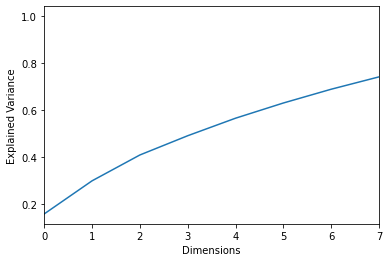

In [15]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Second Principal Component')

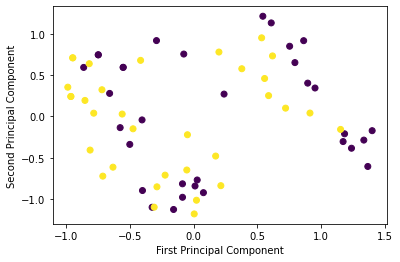

In [16]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Result : In the beginning, having two components did not work well.

In [17]:
for i in range(1,22):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    print('sum: ',sum(pca.explained_variance_ratio_))

sum:  0.15623494945191851
sum:  0.2974093425936082
sum:  0.4077849347875259
sum:  0.48994647697082183
sum:  0.5647605607758427
sum:  0.6296525424386036
sum:  0.6884736724268287
sum:  0.7411917006758806
sum:  0.7862321954920461
sum:  0.8280920097755204
sum:  0.8642804347592634
sum:  0.8975553347794308
sum:  0.9263934322791266
sum:  0.9510357427056526
sum:  0.9699705795175351
sum:  0.9859811295489286
sum:  0.9999999999999999
sum:  0.9999999999999999
sum:  0.9999999999999999
sum:  0.9999999999999999
sum:  0.9999999999999999


Result : Increase after a certain number of components is not efficient, operations get complicated.

## K-means Clustering

In [18]:
from sklearn.cluster import KMeans

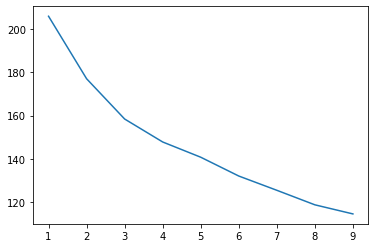

In [19]:
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)

In [20]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 101)
y_kmeans = kmeans.fit_transform(X)
y_kmeans = kmeans.predict(X)

In [21]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(Y,y_kmeans)
print(con)

[[19 14]
 [24  9]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_kmeans))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        33
           1       0.39      0.27      0.32        33

    accuracy                           0.42        66
   macro avg       0.42      0.42      0.41        66
weighted avg       0.42      0.42      0.41        66



## PCA / K-Means together

In [23]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

print('sum: ',sum(pca.explained_variance_ratio_))

sum:  0.8280920097755204


In [24]:
kmeans = KMeans(n_clusters =2, init = 'k-means++', random_state = 101)
y_kmeans = kmeans.fit_predict(X_pca)

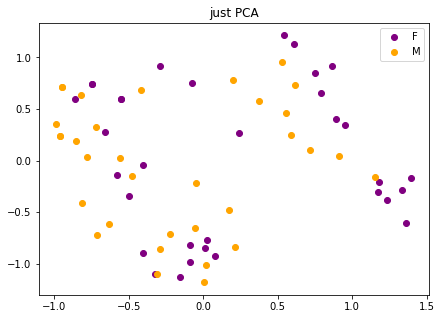

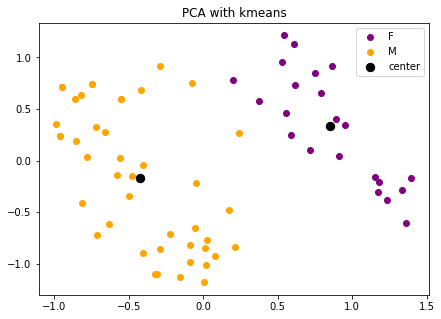

In [25]:
colors = ['purple', 'orange']
cluster = ['F','M']

plt.figure(figsize=(7, 5))
plt.title('just PCA')
for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1],
            color=color, label=cluster[i])
plt.legend()
plt.show()


plt.figure(figsize=(7, 5))
plt.title('PCA with kmeans')
for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
            color=color, label = cluster[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'black', label = 'center')

plt.legend()
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(Y,y_kmeans)
print(con)

[[13 20]
 [ 9 24]]


In [27]:
print(classification_report(Y,y_kmeans))

              precision    recall  f1-score   support

           0       0.59      0.39      0.47        33
           1       0.55      0.73      0.62        33

    accuracy                           0.56        66
   macro avg       0.57      0.56      0.55        66
weighted avg       0.57      0.56      0.55        66



Result: The prediction rate is higher when PCA and clustering are done together.

Not every feature dataset may be useful.

https://www.kaggle.com/hb20007/gender-classification